<a href="https://colab.research.google.com/github/Ang-Li-code/MAT422/blob/main/HW_3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks

The following code and text will cover major topics in neural networks listed as below
- Mathematical formulation
- Activation functions
- Cost function
- Backpropagation
- Backpropagation algorithm

## Mathematical Formulation

An example of a simplar neural network is shown below, where the value of $\hat{y}$ is equal to some function $g (w_1a_1 + w_2a_2 + b)$

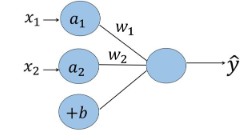

In a more general case, the function from one layer of a neural network to the next layer of the neural network is represented as:

$$
a^{(l)} = σ ( \mathbf{z^{(l)}} ) = σ ( \mathbf{W^{(l)}a^{(l−1)}} + \mathbf{b^{(l)}} )
$$

Where $\mathbf{a^{(l-1)}}$ represents the neurals in the last layer, $\mathbf{W^{(l)}}$ represents the weight of those neurons with respect to the current neuron $a^{(l)}$, and $\mathbf{b^{(l)}}$ represents the bias of those neurons to the current neuron $a^{(l)}$.

Additionally, σ represents the activation function being applied to each of those neurons, which will be covered next.

## Activation Functions

An activation function is simply a way to transform a value from one layer to the next depending on what purpose the neural network is used for. For example, classification.

There are a number of activation functions to choose from, and the following code will plot the ReLU, Sigmoid, and Step functions.

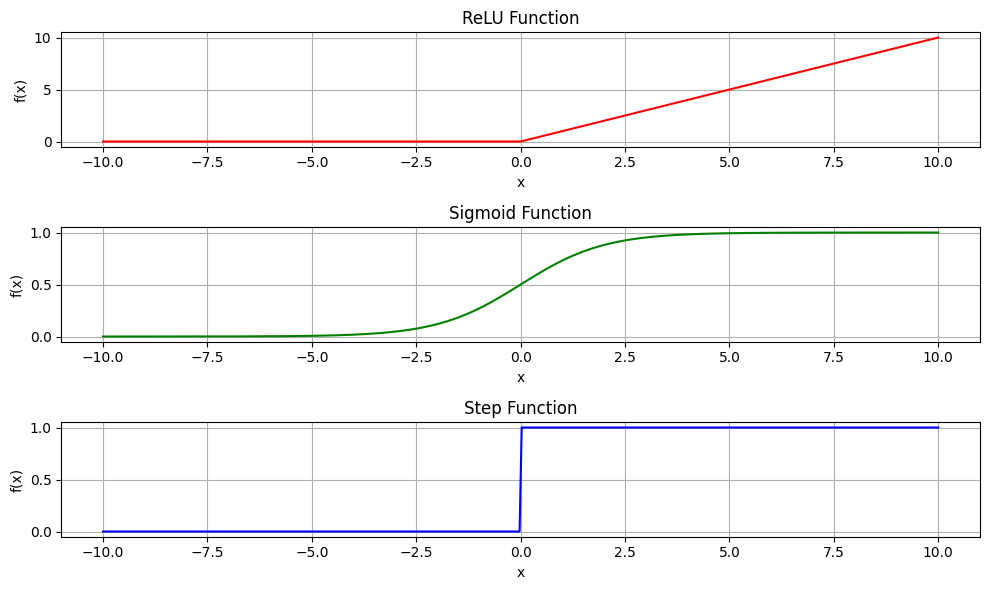

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU, Sigmoid, and Step functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def step(x):
    return np.where(x >= 0, 1, 0)

# Generate a range of x values
x = np.linspace(-10, 10, 400)

# Plot the functions
plt.figure(figsize=(10, 6))

# ReLU function plot
plt.subplot(3, 1, 1)
plt.plot(x, relu(x), label='ReLU', color='r')
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

# Sigmoid function plot
plt.subplot(3, 1, 2)
plt.plot(x, sigmoid(x), label='Sigmoid', color='g')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

# Step function plot
plt.subplot(3, 1, 3)
plt.plot(x, step(x), label='Step', color='b')
plt.title('Step Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()


## Cost Function

Cost functions are a way to gauge how accurate a neural network is in its prediction, and to aide the neural network in improving its accuracy.

Similar to activation functions, there are different models that can be used for different purposes. Below are two examples.

Least Squares:

$$
J = \frac{1}{2} \sum_{n=1}^{N} \sum_{k=1}^{K} \left( \hat{\gamma}_k^{(n)} - \gamma_k^{(n)} \right)^2
$$

Binary Classification:

$$
J = - \sum_{n=1}^{N} \left( y^{(n)} \ln(\hat{y}^{(n)}) + (1 - y^{(n)}) \ln(1 - \hat{y}^{(n)}) \right)
$$

Where $\hat{\gamma}_k^{(n)}$ is the predicted output of the model and $\gamma_k^{(n)}$ is the expected output

## Back Propagation

Back propagation is the heart of a neural network, or, in other words, how the neural network "learns".

For every back propagation pass, the neural network adjusts the weight and bias existent in each layer, going from the output layer to the input layer (hince the name "back" propagation), in order to minimize the cost functiona with each successive pass.

Below is some code that demonstrates the back propagation algorithm

In [9]:
import numpy as np

# Sigmoid Activation Function and its Derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize input data and true outputs
X = np.array([[0, 0],  # First input
              [0, 1],  # Second input
              [1, 0],  # Third input
              [1, 1]]) # Fourth input

y = np.array([[0],   # True output for [0, 0]
              [1],   # True output for [0, 1]
              [1],   # True output for [1, 0]
              [0]])  # True output for [1, 1]

# Set random seed for reproducibility
np.random.seed(1)

# Initialize weights and biases for the layers
input_layer_size = 2  # Number of input neurons
hidden_layer_size = 2 # Number of hidden neurons
output_layer_size = 1 # Number of output neurons

# Weights and biases initialization
w1 = np.random.rand(input_layer_size, hidden_layer_size)  # Weights for input to hidden layer
b1 = np.random.rand(1, hidden_layer_size)  # Bias for hidden layer
w2 = np.random.rand(hidden_layer_size, output_layer_size)  # Weights for hidden to output layer
b2 = np.random.rand(1, output_layer_size)  # Bias for output layer

# Learning rate
learning_rate = 0.1

# Training for a number of iterations
for epoch in range(100000):
    # Forward pass - hidden layer
    z1 = np.dot(X, w1) + b1
    a1 = sigmoid(z1)  # Activation for hidden layer

    # Forward pass - output layer
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)  # Activation for output layer

    # Calculate the loss (Mean Squared Error)
    loss = np.mean((y - a2)**2)

    # Backpropagation to calculate gradients for weights and biases

    # Derivative of the loss with respect to the output
    dL_da2 = a2 - y  # Derivative of loss w.r.t output activation

    # Derivative of output layer (z2) w.r.t weights and biases
    dL_dz2 = dL_da2 * sigmoid_derivative(a2)  # Chain rule to get derivative at output

    # Gradients for w2 and b2
    dL_dw2 = np.dot(a1.T, dL_dz2)  # Derivative w.r.t weights of the second layer
    dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)  # Derivative w.r.t biases of the second layer

    # Derivative of the loss with respect to the hidden layer
    dL_da1 = np.dot(dL_dz2, w2.T)  # Backpropagate the error to the hidden layer
    dL_dz1 = dL_da1 * sigmoid_derivative(a1)  # Derivative w.r.t hidden layer activation

    # Gradients for w1 and b1
    dL_dw1 = np.dot(X.T, dL_dz1)  # Derivative w.r.t weights of the first layer
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)  # Derivative w.r.t biases of the first layer

    # Update weights and biases using gradient descent
    w1 -= learning_rate * dL_dw1
    b1 -= learning_rate * dL_db1
    w2 -= learning_rate * dL_dw2
    b2 -= learning_rate * dL_db2

    # Every 1000 iterations, print the loss
    if epoch % 10000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Final output after training
print("\nFinal Predictions after Training:")
print(a2)


Epoch 0, Loss: 0.28014363590911784
Epoch 10000, Loss: 0.0037797256803040434
Epoch 20000, Loss: 0.0010334748552800741
Epoch 30000, Loss: 0.0005827750649266474
Epoch 40000, Loss: 0.0004026775937457959
Epoch 50000, Loss: 0.0003065318850757287
Epoch 60000, Loss: 0.00024696444229566034
Epoch 70000, Loss: 0.00020652765140037195
Epoch 80000, Loss: 0.00017732246029198592
Epoch 90000, Loss: 0.00015526174670043154

Final Predictions after Training:
[[0.01307122]
 [0.98882554]
 [0.98884326]
 [0.01148458]]
